## Convolutional Filter

/Users/devbhadurkhadka/.pyenv/versions/anaconda3-5.2.0/envs/scikit_practice/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/devbhadurkhadka/.pyenv/versions/anaconda3-5.2.0/envs/scikit_practice/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


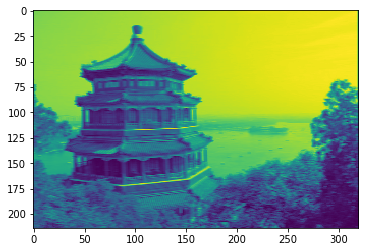

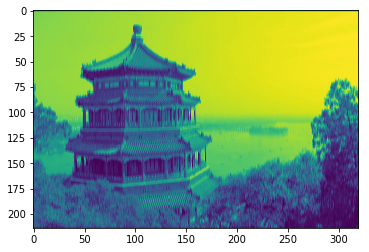

(2, 214, 320, 2)

In [49]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

dataset = np.array(load_sample_images().images, dtype='<f4')
b_size, h, w, ch = dataset.shape

## 2 filters of shape 7,7 for each channel
filter_test = np.zeros(shape=(7,7, ch, 2))
filter_test[3,:,:,0] = 1 ## vertical line as 3 in width direction
filter_test[:,3,:,1] = 1

X = tf.placeholder(tf.float32, shape=(None, h,w,ch))
convolution = tf.nn.conv2d(X, filter_test, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0,:,:,0])
plt.savefig("images/fig1.jpg")
plt.show()
plt.imshow(output[0,:,:,1])
plt.savefig("images/fig2.jpg")
plt.show()

output.shape

## Pooling

(2, 426, 639, 3)

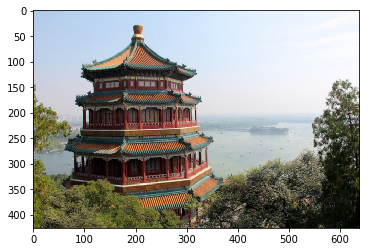

In [57]:
X2 = tf.placeholder(tf.float32, shape=(None, h, w, ch))
max_pool = tf.nn.avg_pool(X2, ksize=[1,2,2,1], strides=[1,1,1,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X2: dataset})
    
plt.imshow(output[0].astype('<u1'))
plt.show

output.shape

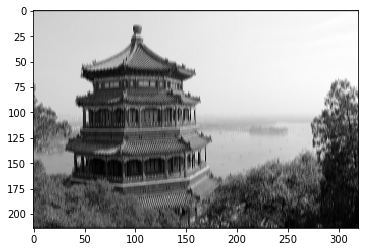

In [33]:
im = np.repeat(output[0,:,:,1][:,:,np.newaxis], 3, axis=2)
plt.imshow(im/np.max(im))

In [1]:
13*13*256

43264